In [8]:
import numpy as np
import pandas 
import questions 
import json
import os
import matplotlib.pyplot as plt
from scipy import stats
import statistics
# import pingouin as pg
# if using a Jupyter notebook, include:
%matplotlib inline

In [16]:
filepath = r"D:\Users\Amer\Desktop\bachelorarbeit\data analysis\questionnaires"

# format of questionnaire JSON: 1:Mental Demand; 2:Temporal Demand; 3:Effort; 4:Frustration; 5:Performance

# make a dictionary so every answer gets assigned to a value
dic = {
    "Very Low": 1,
    "Low": 2,
    "Somewhat Low": 3,
    "Neutral": 4,
    "Somewhat High": 5,
    "High": 6,
    "Very High": 7,
    "Very Good": 1,
    "Good": 2,
    "Somewhat Good": 3,
    "Neutral": 4,
    "Somewhat Poor": 5,
    "Poor": 6,
    "Very Poor": 7,
}

mentalDemand = [0] * 5 
temporalDemand = [0] * 5
effort =  [0] * 5 
frustration= [0] * 5
performance = [0] * 5

mentalList = []
temporalList = []
effortList = []
frustrationList = []
performanceList = []

# list of overall workload
list_of_all = [[]  for _ in range(5)] 



# iterate through all files in the directory
for file in os.listdir(filepath):
    filename = os.fsdecode(file)
    # for designs 1-5
    for i in range(1,6):
        # if text file has design i in name
        if "design " + str(i) in filename:
            

            # extract data from text file
            with open(''.join((filepath, r'\\', file)), 'r') as f:
                line = f.readline()
            questionnairesJSON = json.loads(line)
            mentalDemand[i-1] += dic[questionnairesJSON[0]] 
            temporalDemand[i-1] += dic[questionnairesJSON[1]]
            effort[i-1] += dic[questionnairesJSON[2]]
            frustration[i-1] += dic[questionnairesJSON[3]]
            performance[i-1] += dic[questionnairesJSON[4]]
            
            mentalList.append(dic[questionnairesJSON[0]])
            temporalList.append(dic[questionnairesJSON[1]])
            effortList.append(dic[questionnairesJSON[2]])
            frustrationList.append(dic[questionnairesJSON[3]])
            performanceList.append(dic[questionnairesJSON[4]])
            
            total = 0
            for j in range(0,5):
                total += dic[questionnairesJSON[j]]
            total = total / 5

            list_of_all[i-1].append(total)


print(list_of_all)    



[[1.2, 1.2, 3.2, 2.4, 1.0, 1.2, 1.8, 2.0, 1.8, 2.2, 1.0, 3.2, 1.6], [1.4, 1.8, 1.6, 3.0, 1.0, 1.8, 2.6, 2.0, 1.6, 2.6, 1.8, 4.6, 1.2], [1.4, 1.2, 1.0, 3.4, 1.0, 2.2, 2.0, 2.2, 1.4, 3.0, 1.0, 3.6, 1.2], [3.8, 4.2, 5.0, 5.0, 3.8, 3.8, 3.8, 4.6, 5.0, 5.2, 5.6, 5.4, 3.2], [1.0, 1.8, 1.8, 3.8, 1.0, 1.8, 2.6, 2.6, 2.6, 4.4, 2.6, 1.2]]


[1.830769230769231, 2.076923076923077, 1.8923076923076922, 4.492307692307692, 2.2666666666666666]


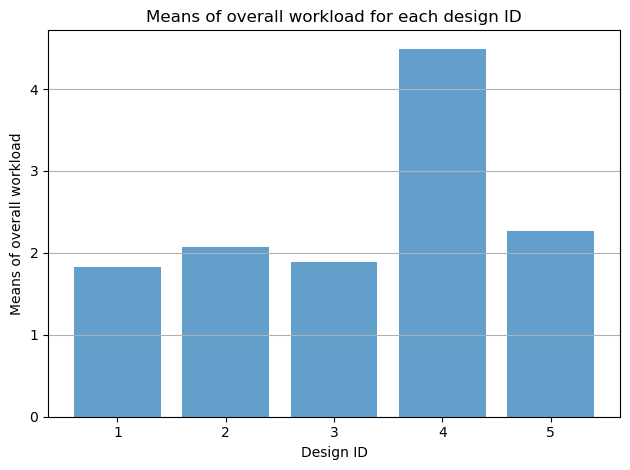

In [22]:
list_of_means = []
for sublist in list_of_all:
    sum = 0
    for item in sublist:
        sum += item
    list_of_means.append((sum / len(sublist)))

print(list_of_means)

designs = [1, 2, 3, 4, 5]
x_pos = np.arange(len(designs))

# Build the plot
fig, ax = plt.subplots()

ax.bar(x_pos, list_of_means, align='center', alpha=0.7)
ax.set_ylabel('Means of overall workload')
ax.set_xlabel('Design ID')
ax.set_xticks(x_pos)
ax.set_xticklabels(designs)
ax.set_title('Means of overall workload for each design ID')
ax.yaxis.grid(True)


# Save the figure and show
plt.tight_layout()
plt.savefig('workload_per_design.png')
plt.show()

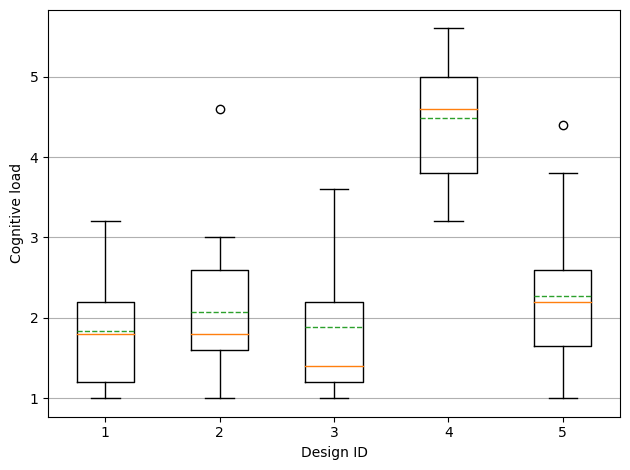

In [12]:

designs = [1, 2, 3, 4, 5]
x_pos = np.arange(len(designs))

# Build the plot
fig, ax = plt.subplots()

ax.set_ylabel('Cognitive load')
ax.set_xlabel('Design ID')
# ax.set_title('Boxplots of overall workload for each design ID')
ax.yaxis.grid(True)


plt.boxplot(x = list_of_all, labels = designs, showmeans = True, meanline = True)
plt.tight_layout()
plt.savefig('boxplot_workload_per_design.png')
plt.show()

In [3]:

stats.kruskal(list_of_all[0], list_of_all[1], list_of_all[2], list_of_all[3], list_of_all[4])

KruskalResult(statistic=28.563319219685237, pvalue=9.587923512989077e-06)

In [34]:

stats.kruskal(list_of_all[0], list_of_all[1], list_of_all[2], list_of_all[4])

KruskalResult(statistic=1.3993778030001531, pvalue=0.7056805841324831)

In [8]:
df = pandas.DataFrame({'M': mentalList,
                   'T': temporalList,
                   'E': effortList,
                   'F': frustrationList,
                   'P': performanceList,
                  })

pg.cronbach_alpha(data=df)

(0.9064089126974885, array([0.865, 0.938]))

In [6]:
flat_list = []
for sublist in list_of_all:
    for item in sublist:
        flat_list.append(item)

stats.shapiro(flat_list)

ShapiroResult(statistic=0.8995577096939087, pvalue=7.700884452788159e-05)

In [17]:
res = stats.wilcoxon(list_of_all[0], list_of_all[3])
print(res)

WilcoxonResult(statistic=0.0, pvalue=0.000244140625)


In [18]:
temp = list_of_all[0]
print(temp)
del temp[7]
print(temp)

res = stats.wilcoxon(temp, list_of_all[4])
print(res)

[1.2, 1.2, 3.2, 2.4, 1.0, 1.2, 1.8, 2.0, 1.8, 2.2, 1.0, 3.2, 1.6]
[1.2, 1.2, 3.2, 2.4, 1.0, 1.2, 1.8, 1.8, 2.2, 1.0, 3.2, 1.6]
WilcoxonResult(statistic=19.0, pvalue=0.21209029797242518)


In [19]:
print(list_of_all[4])

[1.0, 1.8, 1.8, 3.8, 1.0, 1.8, 2.6, 2.6, 2.6, 4.4, 2.6, 1.2]


In [6]:
# calculating range
def find_range(list_of_numbers):
    n_min = min(list_of_numbers)
    n_max = max(list_of_numbers)
    n_range = n_max - n_min
    return n_min, n_max, n_range

for e in list_of_all:
    print(find_range(e))

(1.0, 3.2, 2.2)
(1.0, 4.6, 3.5999999999999996)
(1.0, 3.6, 2.6)
(3.2, 5.6, 2.3999999999999995)
(1.0, 4.4, 3.4000000000000004)


In [7]:
def find_mean(list_of_numbers):
     sum_n = sum(list_of_numbers)
     len_n = len(list_of_numbers)
     mean = sum_n/len_n
     return mean


for e in list_of_all:
    print(find_mean(e))

1.830769230769231
2.076923076923077
1.8923076923076922
4.492307692307692
2.2666666666666666


In [9]:
for e in list_of_all:
    print(statistics.variance(e))

0.5723076923076924
0.9035897435897434
0.8707692307692309
0.5841025641025641
1.1224242424242425
